In [1]:
# Загрузим датасет transaction_data.csv. Проверим размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
# Проверим сколько в датасете пропущенных значений
import pandas as pd
import seaborn as sns
df = pd.read_csv('transaction_data.csv')
df

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [2]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [7]:
df.isna()

,date,name,transaction
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5310,False,False,False
5311,False,False,False
5312,False,False,False
5313,False,False,False


In [5]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [28]:
# Проверим, какие значения принимает колонка transaction .
# Сколько наблюдений относятся к тому или иному уровню? Визуализируем результат
transaction_status = df.groupby('transaction') \
                        .agg({'date':'count'}) \
                        .sort_values('date', ascending=False) \
                        .rename(columns={'date':'quantity'}) \
                        .reset_index()
transaction_status

,transaction,quantity
0,successfull,3692
1,cancelled,1619
2,error,4


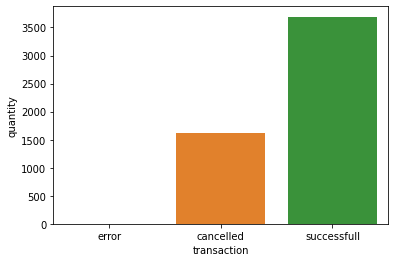

In [26]:
sns.barplot(x = 'transaction', y = 'quantity', data = transaction_status)

In [39]:
# Сколько успешных транзакций осуществил каждый из пользователей?
transaction_successfull = df.query('transaction == "successfull"').groupby('name').agg({'transaction':'count'})
transaction_successfull

,transaction
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68
Ekaterina_Polyanova,68
Ekaterina_Smirnova,77
Irina_Fedorova,62
Irina_Ivanova,60


In [41]:
# Посмотрим на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых
# каждым пользователем
transaction_successfull.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


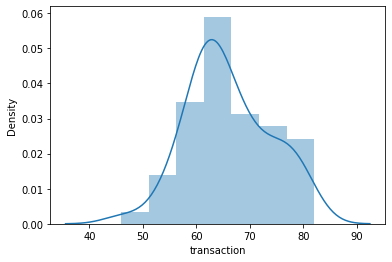

In [40]:
sns.distplot(transaction_successfull.transaction)

In [44]:
# вывод
# Пользователи в среднем совершили примерно по 66 транзакций
# Максимальное число транзакций – 82
# Примерно 25% пользователей совершили менее 61 транзакции

In [ ]:
# В папке находятся файлы (tm_sales_1, tm_sales_2, ...)
# с продажами продуктов через телемаркетинг.
# Каждый файл содержит, как минимум, 4 колонки (поля): FILIAL_ID, SUBS_ID, PROD_ID, ACT_DTTM.

# Проверим подключения продуктов определенным пользователям,
# соединив файлы о продажах с логами по подключениям в системе.
# В результате укажем SUBS_ID из полученного датасета в порядке возрастания, через запятую с пробелом

In [45]:
import os

In [47]:
path = '/subsid/'

In [160]:
df_sale = pd.DataFrame()

In [161]:
for file in os.listdir(path):
    pathfile = path + file
    if file != 'prod_activations_logs.csv':
        df1 = pd.read_csv(pathfile, sep=';')
        df_sale = df_sale.append(df1)
df_sale

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
1,NaN,4,7421,12-03-2020 11:25
2,8362218,7,9879,05-03-2020 11:42
3,2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [62]:
df_sale.dtypes

SUBS_ID        object
PROD_ID         int64
START_DTTM     object
END_DTTM       object
FILIAL_ID     float64
ACT_DTTM       object
dtype: object

In [162]:
df_sale = df_sale.dropna(subset=['SUBS_ID'])

In [163]:
df_sale

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,8362218,7,9879,05-03-2020 11:42
3,2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [164]:
df_sale['SUBS_ID'] = df_sale['SUBS_ID'].apply(lambda x: 'id' + str(x) if not x.startswith('id') else x)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [165]:
df_log = pd.read_csv(path + 'prod_activations_logs.csv', sep=';')
df_log

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43
3,id8641743,2752,20-03-2020 15:44,21-04-2020 15:44
2,id2185490,3210,16-03-2020 16:28,01-12-2020 00:00
6,id7642700,3020,15-03-2020 14:21,15-03-2020 23:42
2,id8741631,5677,19-03-2020 12:28,01-12-2020 00:00


In [166]:
tm_sale = df_sale.merge(df_log, on=['SUBS_ID', 'PROD_ID'], how='inner')

In [169]:
tm_sale

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM
0,id4651830,1,1954,20-03-2020 14:59,20-03-2020 14:59,01-12-2020 00:00
1,id7646509,5,6431,19-03-2020 13:00,19-03-2020 13:00,19-03-2020 13:03
2,id5416547,3,1743,17-03-2020 10:17,17-03-2020 10:17,25-03-2020 11:00
3,id2185490,2,3210,16-03-2020 16:28,16-03-2020 16:28,01-12-2020 00:00
4,id7642700,6,3020,15-03-2020 14:21,15-03-2020 14:21,15-03-2020 23:42


In [171]:
tm_sale['START_DTTM'] = pd.to_datetime(tm_sale['START_DTTM'], format='%d-%m-%Y %H:%M')
tm_sale['END_DTTM'] = pd.to_datetime(tm_sale['END_DTTM'], format='%d-%m-%Y %H:%M')

In [172]:
tm_sale

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM
0,id4651830,1,1954,20-03-2020 14:59,2020-03-20 14:59:00,2020-12-01 00:00:00
1,id7646509,5,6431,19-03-2020 13:00,2020-03-19 13:00:00,2020-03-19 13:03:00
2,id5416547,3,1743,17-03-2020 10:17,2020-03-17 10:17:00,2020-03-25 11:00:00
3,id2185490,2,3210,16-03-2020 16:28,2020-03-16 16:28:00,2020-12-01 00:00:00
4,id7642700,6,3020,15-03-2020 14:21,2020-03-15 14:21:00,2020-03-15 23:42:00


In [175]:
tm_sale['difference'] = (tm_sale['END_DTTM'] - tm_sale['START_DTTM'])
tm_sale['difference_true'] = (tm_sale['END_DTTM'] - tm_sale['START_DTTM']) > '5m'

In [182]:
tm_sale

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM,difference,difference_true
0,id4651830,1,1954,20-03-2020 14:59,2020-03-20 14:59:00,2020-12-01 00:00:00,255 days 09:01:00,True
1,id7646509,5,6431,19-03-2020 13:00,2020-03-19 13:00:00,2020-03-19 13:03:00,0 days 00:03:00,False
2,id5416547,3,1743,17-03-2020 10:17,2020-03-17 10:17:00,2020-03-25 11:00:00,8 days 00:43:00,True
3,id2185490,2,3210,16-03-2020 16:28,2020-03-16 16:28:00,2020-12-01 00:00:00,259 days 07:32:00,True
4,id7642700,6,3020,15-03-2020 14:21,2020-03-15 14:21:00,2020-03-15 23:42:00,0 days 09:21:00,True


In [186]:
tm_sale.query('difference_true == True').sort_values('SUBS_ID').SUBS_ID.tolist()

['id2185490', 'id4651830', 'id5416547', 'id7642700']